In [2]:
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sls
from scipy.optimize import curve_fit

Primeiro, vamos executar a Regressão Linear apenas utilizando o scipy e numpy

In [3]:
idade =[18, 25, 57, 45, 26, 64, 34, 40, 24, 33]
salarioAnual = [15000, 29000, 68000, 52000, 32000, 80000, 41000, 45000, 26000, 33000]

In [5]:
# Transformando as listas em arranjos
xData = np.array(idade)
xSum = np.sum(xData)
yData = np.array(salarioAnual)
ySum = np.sum(yData)
print (xSum, ySum)

366 421000


In [96]:
# Definindo uma equacao da reta
def reta (x, a, b):
    return a * x + b

In [97]:
# Definindo parâmetros iniciais para o otimizador
paramIn = np.array([1.0, 1.0])

Criamos um coeficiente angular ($A$) e um coeficiente linear ($B$) de valor 1.

Vamos otimizar esses valores tais que:  
**para cada** ponto $y$ pertencente à reta $y = A*x + B$,  
a diferença $y - yData$ (onde $yData$ é o valor da variável dependente utilizando o mesmo $x$) seja minimizada

In [98]:
# Definindo parâmetros otimizados através do Erro Médio Quadrado

# Curve fit aplicará a função reta(xData, paramIn) e encontrará os
# valores otimizados para coef. ang e coef. lin.
#
# Retorna os dois parâmetros otimizados e sua covariância
paramOptm, paramCov = curve_fit(reta, xData, yData, paramIn)
# paramCovar contem a covariância dos parametros encontrados

In [99]:
# Cria um novo conjunto de dados Y, utilizando xData
# e os coef. lin, e ang. otimizados
regrLin = reta (xData, *paramOptm)

In [114]:
# Define o erro absoluto com base nos valores de obtidos em regrLin e os
# fornecidos pela base de dados
errAbs = regrLin - yData

In [132]:
sqrErr = np.square(errAbs)
meanSqrErr = np.mean(sqrErr)
print ("Squared Error: \n", sqrErr)
print ("Mean Squared Error: ", meanSqErr)

Squared Error: 
 [ 6754235.72064926  4753539.73513082   945141.11491529  1357264.09892061
 14922749.55265276  3265136.80819131  5405095.90836675  2492284.96778973
   247531.42420891 18990855.55335589]
Mean Squared Error:  5913383.488418132


In [102]:
# Determinando o Coeficiente de Determinação
# np.var(array) define o indíce de variância dos dados
rSqrd = 1.0 - (np.var(errAbs) / np.var(yData))
print('Coeficiente de Determinação R: ', rSqrd)

Coeficiente de Determinação R:  0.9834122037408676


In [103]:
# Equação da reta que foi obtida com o modelo
print('y = {} * x + ({})'.format(paramOptm[0], paramOptm[1]))

y = 1317.263908600044 * x + (-6111.859106470214)


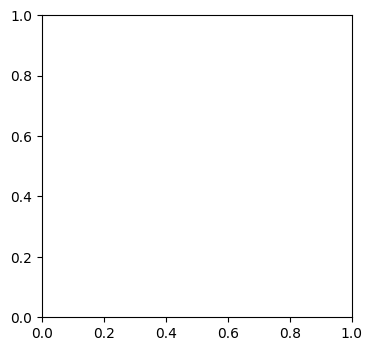

In [104]:
f = plt.figure(figsize = (4,4), dpi = 100)
axes = f.add_subplot(111)

In [110]:
# np.linspace(começo, fim) retorna um array com valores igualmente espaçados entre um
# intervalo [começo, fim]
xModel = np.linspace(min(xData), max(xData))
# Aplicando a nossa regressão linear para todo xModel
yModel = reta(xModel, *paramOptm)

Text(0, 0.5, 'Salário Anual (R$)')

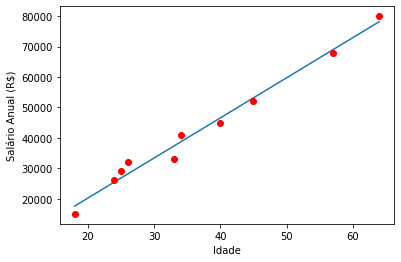

In [111]:
plt.plot(xModel, yModel)
plt.plot(xData, yData, 'ro') #'ro' diz que serão plotados os dados em forma de bolas vermelhas
plt.xlabel('Idade')
plt.ylabel('Salário Anual (R$)')

Abaixo, utilizarei o scikitlearn para realizar o modelo de regressão linear dos dados

In [116]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import mean_squared_error as mSqrErr

In [123]:
reg = LinReg()
# Aqui estamos criando (por necessidade do sklearn) 
# um vetor com todos os valores de xData
xVector = xData.reshape((-1, 1))
# Realizando a regressão.
regrLin = reg.fit(xVector, yData)

In [124]:
prev = reg.predict(xVector)

In [130]:
MSE = mSqrErr(yData, prev)
print('Mean Squared Error: ', MSE)

Mean Squared Error:  5913383.48841813


In [127]:
print('Nova reta:\ny = {} * x + ({})'.format(float(reg.coef_), reg.intercept_))

Nova reta:
y = 1317.2639081370023 * x + (-6111.8590378142835)


In [129]:
from sklearn.metrics import r2_score as r2
r2_score = r2(yData, prev)
print('Coef de Determinação R: ', r2_score)

Coef de Determinação R:  0.9834122037408676


In [134]:
#Comparando os dois métodos:
print('Diferença entre os dois métodos ao calcular MSE: ', np.abs(meanSqrErr - MSE))
print('Diferença entre os dois métodos ao calcular R² score: ', np.abs(rSqrd - r2_score))

Diferença entre os dois métodos ao calcular MSE:  1.862645149230957e-09
Diferença entre os dois métodos ao calcular R² score:  0.0


Vamos trabalhar com um BD de verdade, que fornece dados sobre cérebros humanos.
Relacionaremos o tamanho da cabeça fornecido com seu peso do cérebro.

In [136]:
headbrain = pd.read_csv('./Datasets/headbrain.csv')
headbrain.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [142]:
headbrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [146]:
headbrain.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

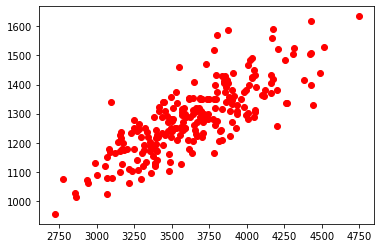

In [179]:
xData = headbrain['Head Size(cm^3)'].to_numpy()
yData = headbrain['Brain Weight(grams)'].to_numpy()
plt.plot(xData, yData, 'ro') 

In [172]:
paramIn = np.array((1.0, 1.0))
paramOptm, paramCov = curve_fit(reta, xData, yData, paramIn)
regrlin = reta(xData, *paramOptm)

In [176]:
errAbs = regrlin - yData
sqrErr = np.square(errAbs)
meanSqrErr = np.mean(sqrErr)
meanSqrErr

5201.3840280023305

In [178]:
rSqrd = 1.0 - (np.var(errAbs) / np.var(yData))
print('Coeficiente de Determinação R: ', rSqrd)

Coeficiente de Determinação R:  0.639311719957


In [180]:
xModel = np.linspace(min(xData), max(xData))
yModel = reta(xModel, *paramOptm)

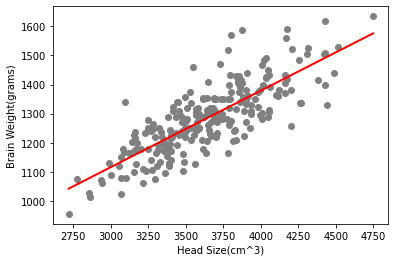

In [189]:
plt.scatter(xData, yData, color = 'gray') 
plt.plot(xModel, yModel, color = 'red', linewidth = 2)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.show()